# -------------------------------- Student Percentage Prediction --------------------------------

## 1. Importing Libraries

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

## 2. Importing Data

In [6]:
# Reading data from remote link

url = "http://bit.ly/w-data"
student = pd.read_csv(url)
print("Data imported successfully")

#printing 1st 10 rows of data
student.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 3. Understanding Data

In [7]:
#to check the statistical description of the data

student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [26]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#Dependent variables : Hours
X = np.array(student[['Hours']]) 

#Independent variables : Scores
y = np.array(student["Scores"])

In [9]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [10]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## 4. Checking Correlation between Attributes

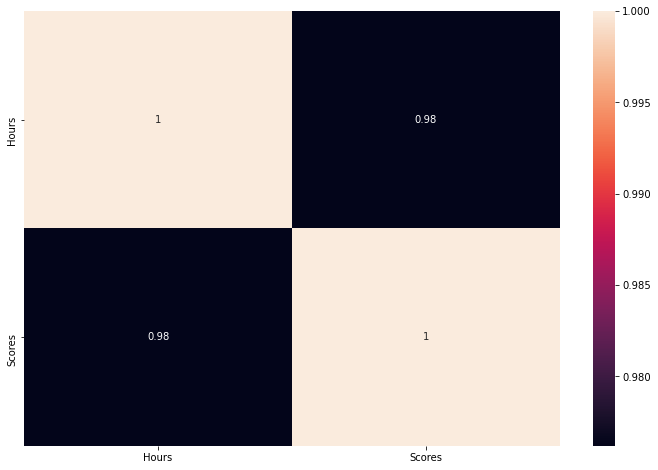

In [11]:
#check correlation and plot heatmap for the same

corr1 = student.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr1,annot=True)
plt.show()

In [12]:
print("Here we can say Scores are directly proportional(with 98% accuracy) to hours.")

Here we can say Scores are directly proportional(with 98% accuracy) to hours.


## 5. Plotting Graph

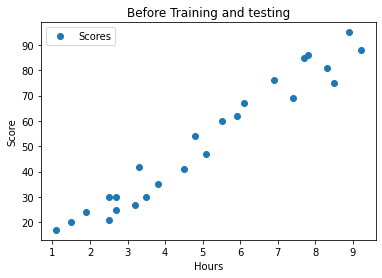

In [13]:
# Plotting the distribution of scores before training and testing

student.plot(x='Hours', y='Scores', style='o')  
plt.title('Before Training and testing')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

## 6. Testing and Training the Data

In [14]:
#importing required library to train and test the data

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25) 

In [28]:
# Data Modelling: 1.Training the data using Linear Regression

from sklearn import linear_model
reg = linear_model.LinearRegression()

print("Training completed.")

Training completed.


In [29]:
# Data Modelling: 1.Fitting the data using Linear Regression


reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Fitting completed.")

Fitting completed.


In [17]:
# Testing data - In Hours
print(X_test)

# Predicting the scores
y_pred = reg.predict(X_test) 

[[3.2]
 [2.7]
 [1.9]
 [7.7]
 [4.8]]


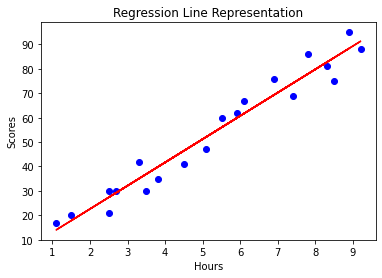

In [18]:
#plotting the linear regression Line

plt.scatter(X_train, y_train, color = "blue")
plt.plot(X_train, reg.predict(X_train), color = "red")
plt.title("Regression Line Representation")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## 7. Actual vs Predicted

In [19]:
#Creating and printing new dataset of actual and predicted values

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,27,34.039712
1,25,29.268910
2,24,21.635627
3,85,76.976930
4,54,49.306278


## 8. Evaluating model

In [30]:
#Evaluating process : 1. Checking MAE

from sklearn import metrics  

print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error : 5.2779574063811205


In [21]:
#2. Checking R2 score

from sklearn.metrics import r2_score

print("R2_score: " + str(r2_score(y_test, y_pred)))

R2_score: 0.9434635261365245


In [22]:
#3.Checking MSE

from sklearn.metrics import mean_squared_error

print("Mean Squared Error: " + str(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 31.95441502763638


In [23]:
print("Successfully completed Prediction of Scores using Linear Regression Model.")

Successfully completed Prediction of Scores using Linear Regression Model.


## 9. Prediction 

Let's try for entries other than already present in dataset!

In [24]:
hours = np.array(9.25)
hours = hours.reshape(-1,1)
prediction = reg.predict(hours)
print("No. of hours = " + str(hours[0]))
print("Percentage of prediction = " + str(prediction[0]))

No. of hours = [9.25]
Percentage of prediction = 91.76641596073156


## ------------------------------------------------------- Thank You! --------------------------------------------------------